In [65]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import tensorflow as tf

from tensorflow.keras.layers import Dense, Input, Concatenate
from tensorflow.keras.models import Model
from tensorflow.keras.losses import SparseCategoricalCrossentropy
from tensorflow.keras.callbacks import ModelCheckpoint

from sklearn.metrics import r2_score
from sklearn.preprocessing import StandardScaler

np.random.seed(123)

### Data Exploration

In [ ]:
# https://archive.ics.uci.edu/ml/datasets/human+activity+recognition+using+smartphones

!wget -nc https://lazyprogrammer.me/course_files/timeseries/UCI-HAR.zip

--2022-01-10 06:27:51--  https://lazyprogrammer.me/course_files/timeseries/UCI-HAR.zip
Resolving lazyprogrammer.me (lazyprogrammer.me)... 172.67.213.166, 104.21.23.210, 2606:4700:3031::6815:17d2, ...
Connecting to lazyprogrammer.me (lazyprogrammer.me)|172.67.213.166|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 60999314 (58M) [application/zip]
Saving to: ‘UCI-HAR.zip’

UCI-HAR.zip         100%[===================>]  58.17M  66.3MB/s    in 0.9s    

2022-01-10 06:27:53 (66.3 MB/s) - ‘UCI-HAR.zip’ saved [60999314/60999314]



In [ ]:
!unzip -nq UCI-HAR.zip

In [ ]:
!ls

 __MACOSX   sample_data  'UCI HAR Dataset'   UCI-HAR.zip


In [ ]:
!ls 'UCI HAR Dataset'

activity_labels.txt  features_info.txt	features.txt  README.txt  test	train


In [ ]:
!ls 'UCI HAR Dataset/train'

'Inertial Signals'   subject_train.txt	 X_train.txt   y_train.txt


In [ ]:
!head 'UCI HAR Dataset/train/subject_train.txt'

1
1
1
1
1
1
1
1
1
1


In [ ]:
!head 'UCI HAR Dataset/train/X_train.txt'

  2.8858451e-001 -2.0294171e-002 -1.3290514e-001 -9.9527860e-001 -9.8311061e-001 -9.1352645e-001 -9.9511208e-001 -9.8318457e-001 -9.2352702e-001 -9.3472378e-001 -5.6737807e-001 -7.4441253e-001  8.5294738e-001  6.8584458e-001  8.1426278e-001 -9.6552279e-001 -9.9994465e-001 -9.9986303e-001 -9.9461218e-001 -9.9423081e-001 -9.8761392e-001 -9.4321999e-001 -4.0774707e-001 -6.7933751e-001 -6.0212187e-001  9.2929351e-001 -8.5301114e-001  3.5990976e-001 -5.8526382e-002  2.5689154e-001 -2.2484763e-001  2.6410572e-001 -9.5245630e-002  2.7885143e-001 -4.6508457e-001  4.9193596e-001 -1.9088356e-001  3.7631389e-001  4.3512919e-001  6.6079033e-001  9.6339614e-001 -1.4083968e-001  1.1537494e-001 -9.8524969e-001 -9.8170843e-001 -8.7762497e-001 -9.8500137e-001 -9.8441622e-001 -8.9467735e-001  8.9205451e-001 -1.6126549e-001  1.2465977e-001  9.7743631e-001 -1.2321341e-001  5.6482734e-002 -3.7542596e-001  8.9946864e-001 -9.7090521e-001 -9.7551037e-001 -9.8432539e-001 -9.8884915e-001 -9.1774264e-001 -1.0000

In [ ]:
!head 'UCI HAR Dataset/train/y_train.txt'

5
5
5
5
5
5
5
5
5
5


In [ ]:
!ls 'UCI HAR Dataset/train/Inertial Signals'

body_acc_x_train.txt  body_gyro_x_train.txt  total_acc_x_train.txt
body_acc_y_train.txt  body_gyro_y_train.txt  total_acc_y_train.txt
body_acc_z_train.txt  body_gyro_z_train.txt  total_acc_z_train.txt


In [ ]:
!ls 'UCI HAR Dataset/test/Inertial Signals'

body_acc_x_test.txt  body_gyro_x_test.txt  total_acc_x_test.txt
body_acc_y_test.txt  body_gyro_y_test.txt  total_acc_y_test.txt
body_acc_z_test.txt  body_gyro_z_test.txt  total_acc_z_test.txt


In [ ]:
!head 'UCI HAR Dataset/train/Inertial Signals/body_acc_x_train.txt'

  1.8085150e-004  1.0138560e-002  9.2755740e-003  5.0658970e-003  1.0810250e-002  4.0451010e-003  4.7573750e-003  6.2136470e-003  3.3067440e-003  7.5719410e-003  5.4071170e-003  6.2212760e-003  6.8950280e-003  4.6102600e-003  7.3313330e-003  5.0776670e-003  5.7625560e-003  6.6927480e-003  5.4432380e-003  8.2409520e-003  6.5064510e-003  6.5315230e-003  7.4224410e-003  5.7717690e-003  6.2401870e-003  4.6229820e-003  4.8329620e-003  5.4987460e-003  4.3411860e-003  5.0980180e-003  4.2687420e-003  3.0451870e-003  3.2041920e-003  4.5204000e-003  5.1272110e-003  3.5497910e-003  4.2342330e-003  4.4686700e-003  3.5727020e-003  5.1362780e-003  5.3797860e-003  4.4085200e-003  2.2440390e-003 -1.1835980e-003 -6.7953420e-004  2.2813890e-003  3.6537280e-003  2.3126390e-003 -4.0421940e-005  5.3422540e-004  2.9632630e-003  4.3994680e-003  2.7023390e-003  3.4523100e-004  2.9169110e-003  4.9785560e-003  3.4468700e-003  4.3781510e-003  5.0061700e-003  1.9967950e-003 -4.7185960e-004 -7.5556790e-004 -1.5281

In [ ]:
df = pd.read_csv('UCI HAR Dataset/train/Inertial Signals/body_acc_x_train.txt',
                 header = None, delim_whitespace = True)
df.head()

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32,33,34,35,36,37,38,39,...,88,89,90,91,92,93,94,95,96,97,98,99,100,101,102,103,104,105,106,107,108,109,110,111,112,113,114,115,116,117,118,119,120,121,122,123,124,125,126,127
0,0.000181,0.010139,0.009276,0.005066,0.010810,0.004045,0.004757,0.006214,0.003307,0.007572,0.005407,0.006221,0.006895,0.004610,0.007331,0.005078,0.005763,0.006693,0.005443,0.008241,0.006506,0.006532,0.007422,0.005772,0.006240,0.004623,0.004833,0.005499,0.004341,0.005098,0.004269,0.003045,0.003204,0.004520,0.005127,0.003550,0.004234,0.004469,0.003573,0.005136,...,0.000389,0.001328,0.002053,0.002738,0.002743,0.001330,-0.000367,-0.000722,-0.001904,-0.004294,-0.000025,0.005251,0.002490,0.000811,0.001166,-0.000693,-0.000077,0.000504,-0.000495,0.000156,0.000065,-0.000320,0.000185,-0.000375,-0.001013,-0.001611,-0.001765,-0.000636,0.001047,0.003019,0.001412,-0.001509,0.000060,0.000435,-0.000819,0.000228,-0.000300,-0.001147,-0.000222,0.001576
1,0.001094,0.004550,0.002879,0.002247,0.003305,0.002416,0.001619,0.000981,0.000009,-0.000363,-0.000487,-0.000356,-0.000229,-0.000131,-0.000441,-0.001565,-0.000929,0.000009,-0.001236,-0.000911,-0.000435,-0.001177,0.000165,0.000751,0.000389,0.001328,0.002053,0.002738,0.002743,0.001330,-0.000367,-0.000722,-0.001904,-0.004294,-0.000025,0.005251,0.002490,0.000811,0.001166,-0.000693,...,-0.001506,-0.002105,-0.001494,0.002181,0.002876,0.000871,-0.000392,-0.000569,0.000569,-0.001176,-0.001957,-0.000471,0.000208,0.003380,0.004829,0.003380,0.001088,-0.001249,0.000387,0.000533,-0.000679,0.000594,-0.000084,-0.000142,0.000784,0.001507,0.003386,0.002166,0.000422,0.000854,-0.000104,-0.000141,0.001333,0.001541,0.001077,-0.000736,-0.003767,-0.004646,-0.002941,-0.001599
2,0.003531,0.002285,-0.000420,-0.003738,-0.006706,-0.003148,0.000733,0.000668,0.002162,-0.000946,-0.006476,-0.003423,-0.000610,-0.002929,-0.001796,0.000956,0.002311,0.002538,0.001180,0.001217,0.000869,0.000686,0.002156,0.000478,-0.001506,-0.002105,-0.001494,0.002181,0.002876,0.000871,-0.000392,-0.000569,0.000569,-0.001176,-0.001957,-0.000471,0.000208,0.003380,0.004829,0.003380,...,0.002138,0.003519,0.002715,0.002370,0.003299,0.002357,0.001481,-0.000340,-0.002201,0.000124,0.002345,0.002706,0.001281,-0.000949,0.000890,0.004952,0.007315,0.004242,-0.002776,-0.004625,-0.001945,0.002561,0.007382,0.005730,0.002901,0.002896,0.000533,0.000552,0.001286,-0.000926,0.000661,0.001853,-0.000268,-0.000394,-0.000279,-0.000316,0.000144,0.001246,0.003117,0.002178
3,-0.001772,-0.001311,0.000388,0.000408,-0.000355,0.000998,0.001109,-0.003149,-0.008882,-0.010483,-0.004482,0.004528,0.008167,0.002929,-0.004487,-0.004717,-0.001637,-0.000097,0.001614,0.002619,0.004765,0.005851,0.002579,0.000677,0.002138,0.003519,0.002715,0.002370,0.003299,0.002357,0.001481,-0.000340,-0.002201,0.000124,0.002345,0.002706,0.001281,-0.000949,0.000890,0.004952,...,0.001470,0.001644,-0.000106,-0.001683,-0.001165,0.000241,0.000216,-0.000102,-0.001546,-0.003518,-0.003204,-0.002376,-0.001825,-0.001754,-0.002504,-0.002612,-0.002715,-0.001748,0.000066,-0.000050,-0.000898,-0.001478,-0.000698,0.000441,-0.001206,-0.002607,-0.001986,-0.001230,-0.001129,-0.001334,0.000458,0.002103,0.001358,0.000820,-0.000212,-0.001915,-0.001631,-0.000867,-0.001172,-0.000028
4,0.000087,-0.000272,0.001022,0.003126,0.002284,0.000885,0.001933,0.002270,0.002247,0.002175,0.001750,0.001420,0.000297,0.000665,0.001911,0.001778,0.001087,-0.000716,-0.001347,-0.000384,-0.000135,0.000666,0.000656,0.000221,0.001470,0.001644,-0.000106,-0.001683,-0.001165,0.000241,0.000216,-0.000102,-0.001546,-0.003518,-0.003204,-0.002376,-0.001825,-0.001754,-0.002504,-0.002612,...,-0.001015,0.001832,0.001169,0.000362,-0.002587,-0.002581,0.001470,0.003026,0.003734,0.001870,-0.000212,0.000945,0.001956,0.002602,0.001366,0.000665,-0.000459,-0.004151,-0.003591,-0.001328,-0.000153,0.001043,0.000407,-0.000614,-0.002858,-0.003824,-0.001411,0.000765,0.001153,0.000627,0.002529,0.003518,-0.000248,-0.002761,

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7352 entries, 0 to 7351
Columns: 128 entries, 0 to 127
dtypes: float64(128)
memory usage: 7.2 MB


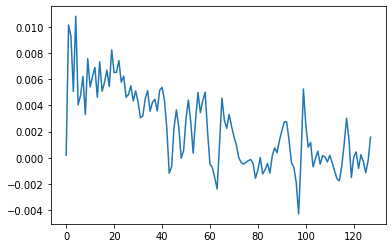

In [ ]:
df.iloc[0].plot();

In [ ]:
# Values are acquired by exploring the dataset
# Can be explored manually from the zip file previously imported

T = 128 # number of columns
Ntrain = 7352 # number of train rows
Ntest = 2947 # number of test rows
D = 9 # number of files
K = 6 # number of classes in activity_labels.txt

In [ ]:
def load_data():
  # Returns:
  # Xtrain (Ntrain x T x D), Ytrain (Ntrain)
  # Xtest (Ntest x T x D), Ytest (Ntest)

  # Preallocating Xtrain and Xtest arrays
  Xtrain = np.zeros((Ntrain, T, D))
  Xtest = np.zeros((Ntest, T, D))

  # train data
  ts_filenames = ['body_acc_x_train.txt', 'body_gyro_x_train.txt', 'total_acc_x_train.txt',
                  'body_acc_y_train.txt', 'body_gyro_y_train.txt', 'total_acc_y_train.txt',
                  'body_acc_z_train.txt', 'body_gyro_z_train.txt', 'total_acc_z_train.txt']
  
  ts_file_prefix = 'UCI HAR Dataset/train/'

  for d, fn in enumerate(ts_filenames):
    df = pd.read_csv(f'{ts_file_prefix}Inertial Signals/{fn}',
                     header = None, delim_whitespace = True)
    
    # Ntrain x T array
    x = df.to_numpy()
    Xtrain[:, :, d] = x

  # Train labels
  Ytrain = pd.read_csv(f'{ts_file_prefix}y_train.txt',
                         header = None).to_numpy() - 1
  Ytrain = Ytrain.flatten()

  # Test data
  ts_filenames = ['body_acc_x_test.txt', 'body_gyro_x_test.txt', 'total_acc_x_test.txt',
                    'body_acc_y_test.txt', 'body_gyro_y_test.txt', 'total_acc_y_test.txt',
                    'body_acc_z_test.txt', 'body_gyro_z_test.txt', 'total_acc_z_test.txt']

  ts_file_prefix = 'UCI HAR Dataset/test/'

  for d, fn in enumerate(ts_filenames):
    df = pd.read_csv(f'{ts_file_prefix}Inertial Signals/{fn}',
                       header = None, delim_whitespace = True)
    
    # Ntest x T array
    x = df.to_numpy()
    Xtest[:, :, d] = x

  # Test labels
  Ytest = pd.read_csv(f'{ts_file_prefix}y_test.txt',
                         header = None).to_numpy() - 1
  Ytest = Ytest.flatten()

  return Xtrain, Ytrain, Xtest, Ytest

In [ ]:
Xtrain, Ytrain, Xtest, Ytest = load_data()

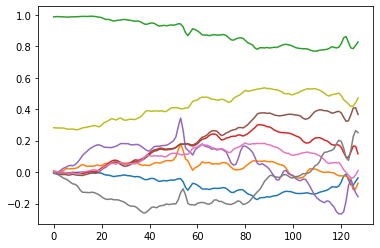

In [ ]:
# Plot all D = 9 time series of length T = 128

plt.plot(Xtrain[7000, :, :]);

### ANN

In [ ]:
# ANN

inputs = []
features = []

# Make a neural network for each of the D time series

for d in range(D):
  i = Input(shape = (T,))
  x = Dense(32, activation = 'relu')(i)
  x = Dense(16, activation = 'relu')(x)
  inputs.append(i)
  features.append(x)

# Output of concatenate will be D * (size of individual ANN output)

x = Concatenate()(features)
x = Dense(K)(x)
model = Model(inputs, x)

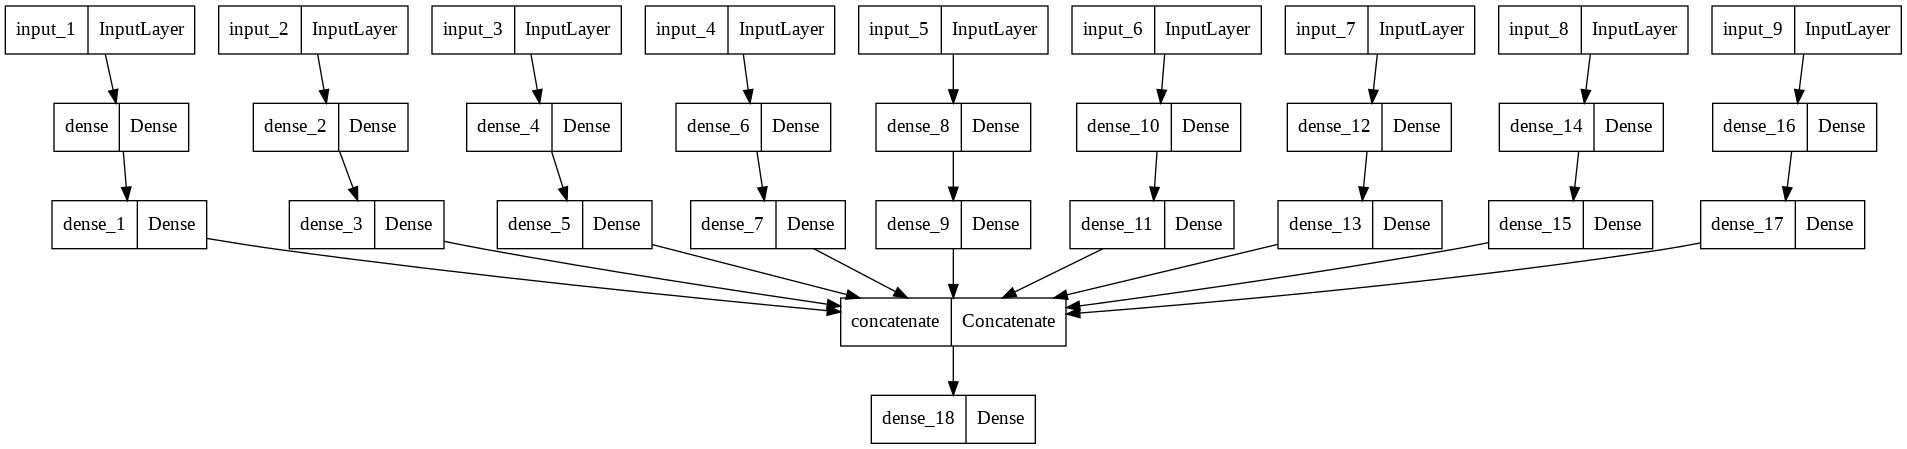

In [ ]:
tf.keras.utils.plot_model(model)

In [ ]:
# 1st argument file name
# 2nd argument metrics taken
# 3rd argument equals True to only save the best model

check_point = ModelCheckpoint('best_model.h5', monitor = 'val_accuracy', save_best_only = True)

In [ ]:
model.compile(loss = SparseCategoricalCrossentropy(from_logits = True),
              optimizer = 'adam', metrics = ['accuracy'])

In [ ]:
Xtrain_split = []
Xtest_split = []

for d in range(D):
  Xtrain_split.append(Xtrain[:, :, d])
  Xtest_split.append(Xtest[:, :, d])

In [ ]:
# Call fit function

r = model.fit(Xtrain_split, Ytrain, epochs = 15,
              callbacks = [check_point], validation_data = (Xtest_split, Ytest)) 

Epoch 1/15
230/230 [==============================] - 2s 5ms/step - loss: 0.7332 - accuracy: 0.7395 - val_loss: 0.4913 - val_accuracy: 0.8283
Epoch 2/15
230/230 [==============================] - 1s 4ms/step - loss: 0.2425 - accuracy: 0.9200 - val_loss: 0.3899 - val_accuracy: 0.8714
Epoch 3/15
230/230 [==============================] - 1s 4ms/step - loss: 0.1726 - accuracy: 0.9389 - val_loss: 0.3117 - val_accuracy: 0.8823
Epoch 4/15
230/230 [==============================] - 1s 4ms/step - loss: 0.1408 - accuracy: 0.9518 - val_loss: 0.3183 - val_accuracy: 0.8897
Epoch 5/15
230/230 [==============================] - 1s 4ms/step - loss: 0.1240 - accuracy: 0.9555 - val_loss: 0.3033 - val_accuracy: 0.8938
Epoch 6/15
230/230 [==============================] - 1s 4ms/step - loss: 0.1134 - accuracy: 0.9596 - val_loss: 0.2990 - val_accuracy: 0.8972
Epoch 7/15
230/230 [==============================] - 1s 4ms/step - loss: 0.1046 - accuracy: 0.9630 - val_loss: 0.2922 - val_accuracy: 0.8965
Epoch 

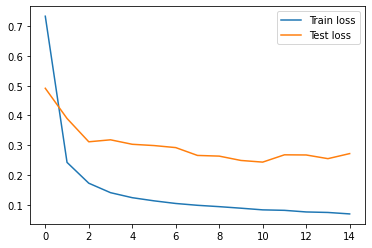

In [ ]:
# Plot train and validation loss

plt.plot(r.history['loss'], label = 'Train loss')
plt.plot(r.history['val_loss'], label = 'Test loss')
plt.legend();

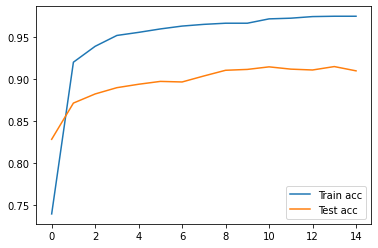

In [ ]:
# Plot train and validation accuracy

plt.plot(r.history['accuracy'], label = 'Train acc')
plt.plot(r.history['val_accuracy'], label = 'Test acc')
plt.legend();

In [ ]:
# Load best model

best_model = tf.keras.models.load_model('best_model.h5')

In [ ]:
# Make predictions

Ptest = best_model.predict(Xtest_split)

In [ ]:
# Evaluate accuracy
# Ptest = N x K matrix of probabilities
# To convert it to labels we need argmax to find the max value. The result is a 
# 1D array of predictive labels

# After the predictive labels acquired, == Ytest is used to do an element wise
# comparison. It returns an array of boolean (1 = true, 0 = false)

# Use the .mean to get the average of the array (accuracy)

np.mean(np.argmax(Ptest, axis = 1) == Ytest)

0.9148286392941974

### Scaling

In [ ]:
from sklearn.preprocessing import StandardScaler

In [60]:
def load_features():
  # Returns:
  # X_train (Ntrain x D)
  # X_test (Ntest x D)

  # train data
  df = pd.read_csv('UCI HAR Dataset/train/X_train.txt', header = None,
                   delim_whitespace = True)
  
  feat_train = df.to_numpy()

  # test data
  df = pd.read_csv('UCI HAR Dataset/test/X_test.txt', header = None,
                   delim_whitespace = True)
  
  feat_test = df.to_numpy()

  ss = StandardScaler()
  feat_train = ss.fit_transform(feat_train)
  feat_test = ss.transform(feat_test)

  return feat_train, feat_test

In [61]:
feat_train, feat_test = load_features()

In [62]:
# Determine the dimentionality of the features (number of columns in both arrays)

D_feat = feat_train.shape[1]

In [63]:
# Basic ANN

# Create input layer with dimensionality D_feat
i = Input(shape = (D_feat,))

# Create 1st hidden layer size of 32 with relu
x = Dense(32, activation = 'relu')(i) 

# Output layer Dense of output size K
x = Dense(K)(x) 

# Instantiate model object passing the input and output
model = Model(i, x)

In [67]:
model.compile(loss = SparseCategoricalCrossentropy(from_logits = True),
              optimizer = 'adam',
              metrics = ['accuracy'])

In [69]:
check_point2 = ModelCheckpoint('best_model_basic.h5', monitor = 'val_accuracy',
                               save_best_only = True)

In [71]:
# Call fit function

r = model.fit(feat_train, Ytrain, epochs = 15, callbacks = [check_point2],
              validation_data = (feat_test, Ytest))

Epoch 1/15
230/230 [==============================] - 1s 3ms/step - loss: 0.3576 - accuracy: 0.8636 - val_loss: 0.2220 - val_accuracy: 0.9179
Epoch 2/15
230/230 [==============================] - 1s 2ms/step - loss: 0.1137 - accuracy: 0.9611 - val_loss: 0.2021 - val_accuracy: 0.9199
Epoch 3/15
230/230 [==============================] - 0s 2ms/step - loss: 0.0785 - accuracy: 0.9742 - val_loss: 0.1850 - val_accuracy: 0.9264
Epoch 4/15
230/230 [==============================] - 0s 2ms/step - loss: 0.0615 - accuracy: 0.9797 - val_loss: 0.1811 - val_accuracy: 0.9352
Epoch 5/15
230/230 [==============================] - 0s 2ms/step - loss: 0.0572 - accuracy: 0.9784 - val_loss: 0.1959 - val_accuracy: 0.9287
Epoch 6/15
230/230 [==============================] - 1s 2ms/step - loss: 0.0462 - accuracy: 0.9846 - val_loss: 0.1717 - val_accuracy: 0.9396
Epoch 7/15
230/230 [==============================] - 0s 2ms/step - loss: 0.0452 - accuracy: 0.9850 - val_loss: 0.1913 - val_accuracy: 0.9376
Epoch 

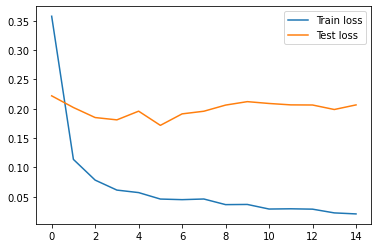

In [72]:
# Plot train and validation loss

plt.plot(r.history['loss'], label = 'Train loss')
plt.plot(r.history['val_loss'], label = 'Test loss')
plt.legend();

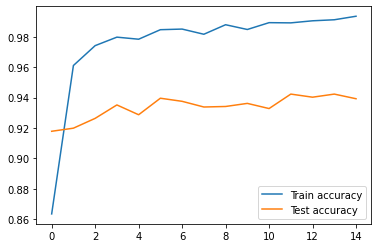

In [73]:
# Plot train and validation accuracy

plt.plot(r.history['accuracy'], label = 'Train accuracy')
plt.plot(r.history['val_accuracy'], label = 'Test accuracy')
plt.legend();

In [74]:
# Load best model

best_model = tf.keras.models.load_model('best_model_basic.h5')

In [75]:
# Make predictions

Ptest = best_model.predict(feat_test)

In [76]:
# Evaluate accuracy
# Ptest = N x K matrix of probabilities
# To convert it to labels we need argmax to find the max value. The result is a 
# 1D array of predictive labels

# After the predictive labels acquired, == Ytest is used to do an element wise
# comparison. It returns an array of boolean (1 = true, 0 = false)

# Use the .mean to get the average of the array (accuracy)

np.mean(np.argmax(Ptest, axis = 1) == Ytest)

0.9423142178486597

### Try Other Algorithms

In [77]:
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier

#### Logistic Regression

In [79]:
model = LogisticRegression(solver = 'liblinear')
model.fit(feat_train, Ytrain)
model.score(feat_train, Ytrain)

0.9945593035908596

In [80]:
# The model has better accuracy than the neural network
# Suggesting that the data close to a linear decision boundary

model.score(feat_test, Ytest)

0.9613165931455717

#### SVC

In [81]:
model = SVC()
model.fit(feat_train, Ytrain)
model.score(feat_train, Ytrain)

0.9866702937976061

In [83]:
model.score(feat_test, Ytest)

0.9521547336274178

In [84]:
# Try again with different kernel

model = SVC(kernel = 'linear')
model.fit(feat_train, Ytrain)
model.score(feat_train, Ytrain)

0.9968715995647442

In [85]:
model.score(feat_test, Ytest)

0.9609772650152698

#### Random Forest

In [86]:
model = RandomForestClassifier()
model.fit(feat_train, Ytrain)
model.score(feat_train, Ytrain)

1.0

In [87]:
model.score(feat_test, Ytest)

0.9307770614183916

### Combined Model

In [88]:
# Combining multi input time series ANN and feature based ANN

inputs = []
features = []

# Make a neural network for each of the D time series

for d in range(D):
  i = Input(shape = (T,))
  x = Dense(32, activation = 'relu')(i) 
  x = Dense(16, activation = 'relu')(x)
  inputs.append(i)
  features.append(x)

i2 = Input(shape = (D_feat,))
x2 = Dense(32, activation = 'relu')(i2)

# Output of concatenate will be D * (size of individual ANN output)

x = Concatenate()(features + [x2])
x = Dense(K)(x)
model = Model(inputs + [i2], x)

In [89]:
model.compile(loss = SparseCategoricalCrossentropy(from_logits = True),
              optimizer = 'adam', metrics = ['accuracy'])

In [90]:
check_point3 = ModelCheckpoint('best_model_combined.h5', monitor = 'val_accuracy',
                               save_best_only = True)

In [91]:
# Call fit function

r = model.fit(Xtrain_split + [feat_train], Ytrain, epochs = 15, 
              callbacks = [check_point3],
              validation_data = (Xtest_split + [feat_test], Ytest))

Epoch 1/15
230/230 [==============================] - 2s 6ms/step - loss: 0.2938 - accuracy: 0.8953 - val_loss: 0.2865 - val_accuracy: 0.8873
Epoch 2/15
230/230 [==============================] - 1s 4ms/step - loss: 0.0944 - accuracy: 0.9679 - val_loss: 0.2087 - val_accuracy: 0.9270
Epoch 3/15
230/230 [==============================] - 1s 4ms/step - loss: 0.0682 - accuracy: 0.9758 - val_loss: 0.1869 - val_accuracy: 0.9362
Epoch 4/15
230/230 [==============================] - 1s 4ms/step - loss: 0.0569 - accuracy: 0.9784 - val_loss: 0.1630 - val_accuracy: 0.9450
Epoch 5/15
230/230 [==============================] - 1s 4ms/step - loss: 0.0454 - accuracy: 0.9831 - val_loss: 0.1704 - val_accuracy: 0.9484
Epoch 6/15
230/230 [==============================] - 1s 4ms/step - loss: 0.0412 - accuracy: 0.9860 - val_loss: 0.1785 - val_accuracy: 0.9464
Epoch 7/15
230/230 [==============================] - 1s 4ms/step - loss: 0.0379 - accuracy: 0.9864 - val_loss: 0.1688 - val_accuracy: 0.9511
Epoch 

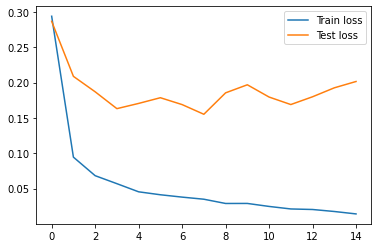

In [92]:
# Plot train and validation loss

plt.plot(r.history['loss'], label = 'Train loss')
plt.plot(r.history['val_loss'], label = 'Test loss')
plt.legend();

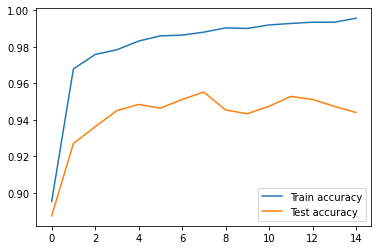

In [93]:
# Plot train and validation accuracy

plt.plot(r.history['accuracy'], label = 'Train accuracy')
plt.plot(r.history['val_accuracy'], label = 'Test accuracy')
plt.legend();

In [94]:
# Load best model

best_model = tf.keras.models.load_model('best_model_combined.h5')

In [95]:
# Make predictions

Ptest = best_model.predict(Xtest_split + [feat_test])

In [96]:
# Evaluate accuracy
# Ptest = N x K matrix of probabilities
# To convert it to labels we need argmax to find the max value. The result is a 
# 1D array of predictive labels

# After the predictive labels acquired, == Ytest is used to do an element wise
# comparison. It returns an array of boolean (1 = true, 0 = false)

# Use the .mean to get the average of the array (accuracy)

np.mean(np.argmax(Ptest, axis = 1) == Ytest)

0.9552086868001357